In [2]:
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
import pipeline.pipeline as pipeline
import db.knowhere_db as kdb
import time
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [26]:
reader = kdb.Reader('knowhere')
emil_GPS = reader.get_dataframe_pivoted(collection='iphone_test',username='emil',sensor='GPS')
emil_GPS = emil_GPS[['GPS (Altitude)','GPS (Latitude)','GPS (Longitude)']].astype(float)

In [28]:
data_scaled = preprocessing.scale(emil_GPS)
h_clustering = AgglomerativeClustering()
h_clustering.set_params(n_clusters = 4)
h_clustering.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=4,
            pooling_func=<function mean at 0x106f2a1b8>)

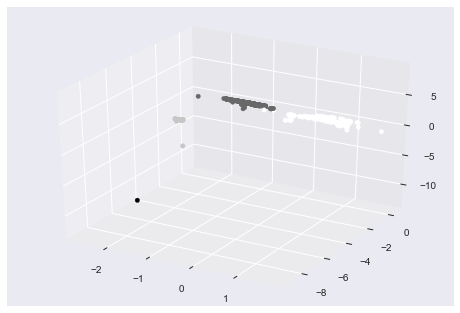

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c = h_clustering.labels_, alpha = 1.0)

In [81]:
reader = kdb.Reader('knowhere')
emil_nonGPS = reader.get_dataframe_pivoted(collection='iphone_test',username='emil')

In [82]:
emil_nonGPS = emil_nonGPS[['Acceleration (x)', 'Acceleration (y)', 'Acceleration (z)', 'Attitude (Pitch)',\
                           'Attitude (Quarternion w)', 'Attitude (Quarternion x)', 'Attitude (Quarternion y)',\
                           'Attitude (Quarternion z)','Attitude (Roll)', 'Attitude (Yaw)',\
                           'Compass (Heading (Magnetic North))', 'Compass (Heading (True North))',\
                           'Compass (x)', 'Compass (y)', 'Compass (z)', 'Gravity (x)', 'Gravity (y)',\
                           'Gravity (z)', 'Gyrometer (x)', 'Gyrometer (y)', 'Gyrometer (z)',\
                           'Magnetometer (raw) (x)', 'Magnetometer (raw) (y)', 'Magnetometer (raw) (z)',\
                           'Microphone (Left Channel Level)', 'Microphone (Right Channel Level)']]

In [83]:
print len(emil_nonGPS)
emil_nonGPS = emil_nonGPS.dropna()
np.sum(emil_nonGPS.isnull())
print len(emil_nonGPS)

4449
43


In [77]:
data_scaled2 = preprocessing.scale(emil_nonGPS)
h_clustering = AgglomerativeClustering()
h_clustering.set_params(n_clusters = 4)
h_clustering.fit(data_scaled2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=4,
            pooling_func=<function mean at 0x106f2a1b8>)

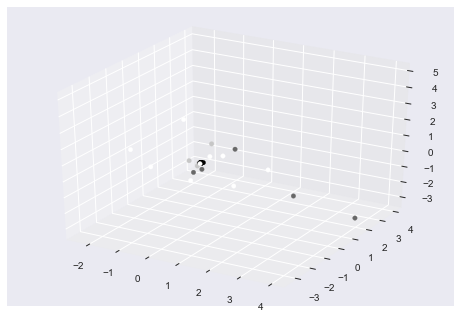

In [79]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled2[:, 0], data_scaled2[:, 1], data_scaled2[:, 2], c = h_clustering.labels_, alpha = 1.0)